In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (7, 4)

In [3]:
def getKaggleMNIST():
    # MNIST data:
    # column 0 is labels
    # column 1-785 is data, with values 0 .. 255
    # total size of CSV: (42000, 1, 28, 28)
    train = pd.read_csv('dataset/train.csv').values.astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest

In [4]:
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

In [5]:
Xtrain.shape

(41000, 784)

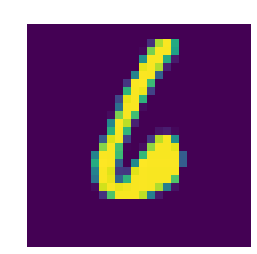

In [6]:
plt.matshow(Xtrain[0].reshape(28,-1))
plt.axis('off')
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = (10,7)

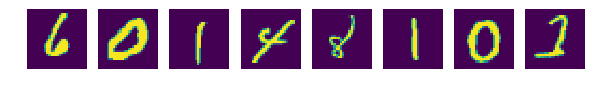

In [8]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis('off')
    plt.imshow(Xtrain[i].reshape(28,-1))

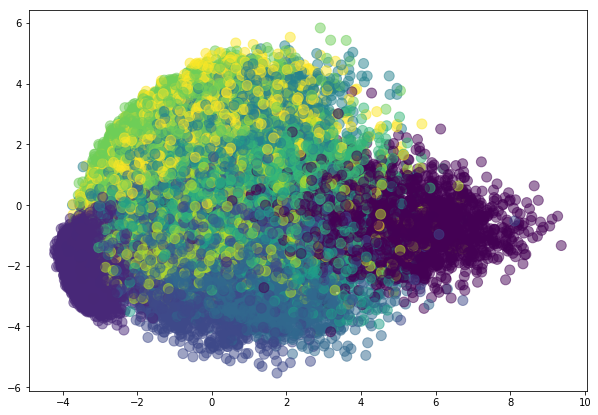

In [9]:
pca = PCA()
reduced = pca.fit_transform(Xtrain)
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.5)
plt.show()

In [10]:
print(pca.explained_variance_ratio_.shape)

(784,)


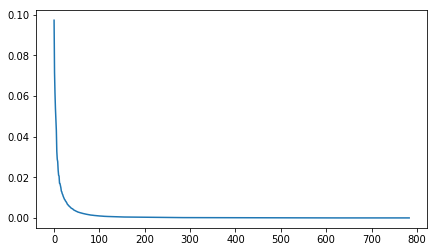

In [11]:
plt.rcParams['figure.figsize'] = (7, 4)
plt.plot(pca.explained_variance_ratio_)
plt.show()

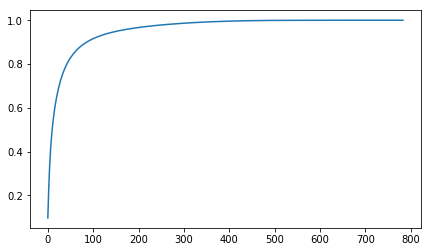

In [12]:
# cumulative variance
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.plot(cumulative)
plt.show()